In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/catgka/dog.jpeg
/kaggle/input/catgka/cat.jpeg
/kaggle/input/catgka/car.jpeg
/kaggle/input/truckop/101883140-5438832203_da6d83ccd6_o.jpg
/kaggle/input/cifar10-python/cifar-10-python.tar.gz
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_1
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_2
/kaggle/input/cifar10-python/cifar-10-batches-py/batches.meta
/kaggle/input/cifar10-python/cifar-10-batches-py/test_batch
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_3
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_5
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_4
/kaggle/input/cifar10-python/cifar-10-batches-py/readme.html


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
(x_train, y_train), (x_test, y_test)= cifar10.load_data()

170498071/170498071 [==============================] - 12s 0us/step


In [4]:
print(x_train.shape)

(50000, 32, 32, 3)


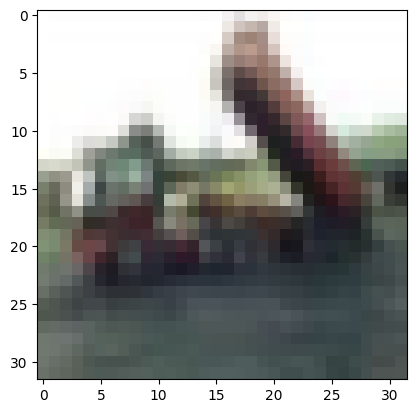

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2])

In [6]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
# x_train = x_train.reshape(-1, 28, 28, 1)
# x_test = x_test.reshape(-1, 28, 28, 1)

In [7]:
print(x_train.shape)

(50000, 32, 32, 3)


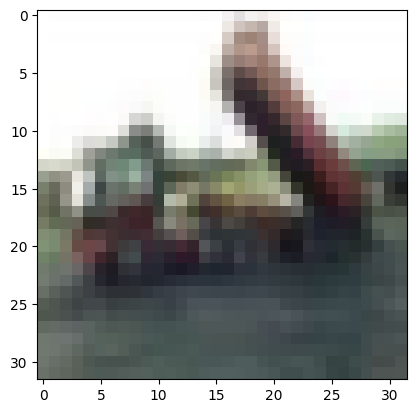

In [8]:
plt.imshow(x_train[2])

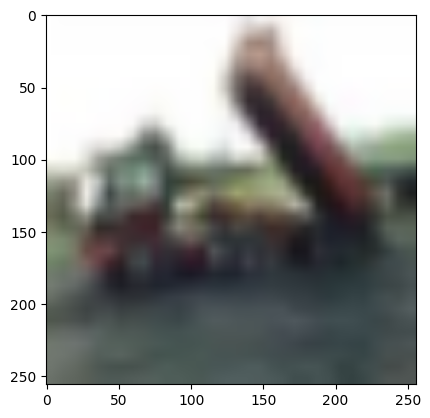

In [9]:
import cv2
# from skimage.filters import unsharp_mask
import matplotlib.pyplot as plt
img = x_train[2]
# img_blur = cv2.GaussianBlur(img, (5,5),0)
# img_sharp = unsharp_mask(img, radius=0, amount=0)
img_resized= cv2.resize(img, (256,256))
# plt.imshow(img_sharp)
plt.imshow(img_resized, vmin=0, vmax=255)
plt.show()

In [10]:
from functools import partial
from tensorflow import keras
from tensorflow.keras import layers

DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size = 3, padding="same", activation = 'relu')
model1 = tf.keras.Sequential(
    [
        DefaultConv2D(filters=64, kernel_size=3,input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        DefaultConv2D(filters=128),
        DefaultConv2D(filters=128),
        DefaultConv2D(filters=128),
        layers.BatchNormalization(),
        layers.MaxPool2D(),        
        DefaultConv2D(filters=256),
        DefaultConv2D(filters=256),
        DefaultConv2D(filters=256),
        layers.BatchNormalization(),
        layers.MaxPool2D(),
#         DefaultConv2D(filters=512),
#         DefaultConv2D(filters=512),
#         DefaultConv2D(filters=512),
#         layers.MaxPool2D(),
#         DefaultConv2D(filters=512),
#         DefaultConv2D(filters=512),
#         layers.MaxPool2D(),
        layers.Flatten(),
#         layers.Dense(units=256, activation="relu", kernel_initializer="he_normal"),
#         layers.Dropout(0.2),
#         layers.Dense(units=128, activation="relu", kernel_initializer="he_normal"),
#         layers.Dropout(0.2),
        layers.Dense(10, activation="softmax"),
    ]
)

model1.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

first=model1.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.1)


Epoch 1/15
352/352 [==============================] - 25s 48ms/step - loss: 2.4086 - accuracy: 0.3839 - val_loss: 3.9570 - val_accuracy: 0.1790
Epoch 2/15
352/352 [==============================] - 16s 45ms/step - loss: 1.3695 - accuracy: 0.5561 - val_loss: 1.7769 - val_accuracy: 0.4798
Epoch 3/15
352/352 [==============================] - 16s 45ms/step - loss: 0.9866 - accuracy: 0.6674 - val_loss: 1.1576 - val_accuracy: 0.6432
Epoch 4/15
352/352 [==============================] - 16s 45ms/step - loss: 0.8010 - accuracy: 0.7264 - val_loss: 1.2932 - val_accuracy: 0.6196
Epoch 5/15
352/352 [==============================] - 16s 45ms/step - loss: 0.6811 - accuracy: 0.7647 - val_loss: 1.3113 - val_accuracy: 0.6730
Epoch 6/15
352/352 [==============================] - 16s 45ms/step - loss: 0.5877 - accuracy: 0.7965 - val_loss: 1.8710 - val_accuracy: 0.5450
Epoch 7/15
352/352 [==============================] - 16s 46ms/step - loss: 0.4847 - accuracy: 0.8319 - val_loss: 0.7926 - val_accuracy:

In [11]:

score1 = model1.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score1[0])
print("Test accuracy:", score1[1])

Test loss: 1.3020389080047607
Test accuracy: 0.761900007724762


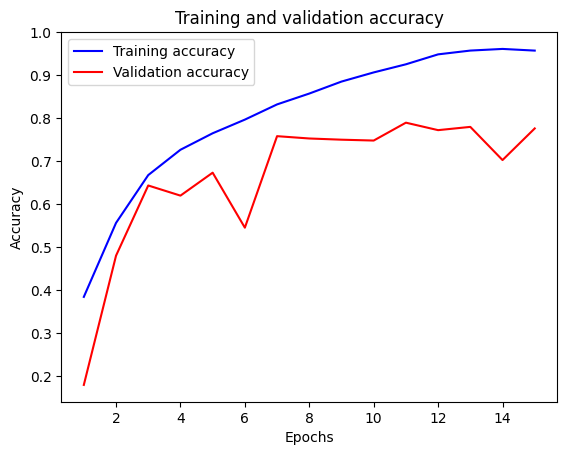

In [12]:
import matplotlib.pyplot as plt

# get the training and validation accuracy from the history object
train_acc = first.history['accuracy']
val_acc = first.history['val_accuracy']

# create a list of epochs
epochs = range(1, len(train_acc) + 1)

# plot the accuracy curves
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


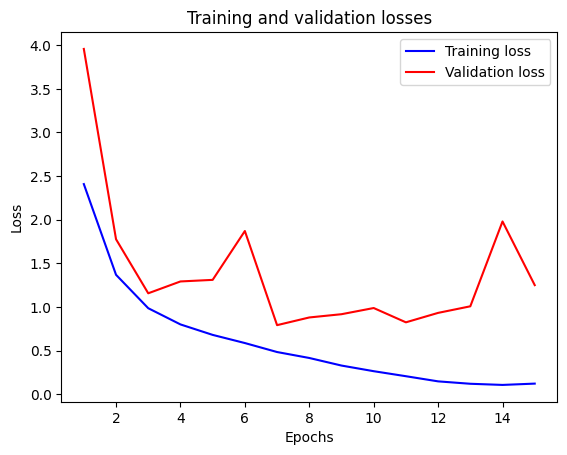

In [13]:
import matplotlib.pyplot as plt

# get the training and validation accuracy from the history object
train_loss = first.history['loss']
val_loss = first.history['val_loss']

# create a list of epochs
epochs = range(1, len(train_acc) + 1)

# plot the accuracy curves
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [14]:
import cv2
# Load an image to predict (replace with your own image)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']
img = cv2.imread('/kaggle/input/catgka/car.jpeg', cv2.IMREAD_GRAYSCALE)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Preprocess the image for prediction
img = cv2.resize(img, (32, 32))
img = img.astype('float32')/ 255.0
# img = np.expand_dims(img, axis=-1)
img = np.expand_dims(img, axis=0)

# Make a prediction on the image
pred = model1.predict(img)

print(pred)
# Get the predicted class label
class_label = np.argmax(pred[0])

# Get the predicted class name
class_name = class_names[class_label]

# Print the predicted class name
print('Predicted class:', class_name)


1/1 [==============================] - 0s 189ms/step
[[6.28538604e-04 9.51324165e-01 5.98323968e-09 1.83338811e-09
  2.54045926e-06 7.77927411e-09 7.73520255e-03 1.31813485e-08
  3.97135355e-02 5.96097438e-04]]
Predicted class: automobile
